In [1]:
# 1. Problem Statement
# The problem is to predict the sales of items in various outlets based on certain features such as item weight, item type,
# outlet type, etc. This is a regression problem where we aim to predict the continuous target variable 'Item_Outlet_Sales'
# using various independent variables or features available in the dataset.


In [2]:
# 2. Hypothesis Generation
# Based on domain knowledge and intuition, we can generate the following hypotheses:
# 1. Items with higher visibility are likely to have higher sales.
# 2. Items with lower fat content may be perceived as healthier and may have higher sales.
# 3. Items with higher MRP (Maximum Retail Price) may have higher sales, as they may be perceived as premium products.
# 4. Stores located in urban areas may have higher sales compared to rural areas.
# 5. Stores with larger size may have higher sales due to higher inventory and variety.
# 6. Stores established earlier may have higher sales due to a larger customer base.
# 7. Certain types of items (e.g., perishable vs. non-perishable) may have different sales patterns.
# 8. Outlet type may also influence sales, with supermarkets potentially having higher sales compared to grocery stores.
# 9. Location type (e.g., Tier 1, Tier 2, Tier 3) may also affect sales, with Tier 1 locations potentially having higher sales.
# 10. Interaction effects between certain variables (e.g., item type and outlet type) may influence sales.


In [3]:
# 3. Loading Packages and Data
# Import necessary libraries
import pandas as pd
import numpy as np

# Load train and test data
train_data = pd.read_csv("E:\College\TecnoCollab\Train.csv")
test_data = pd.read_csv("E:\College\TecnoCollab\Test.csv")

# Display the first few rows of the train data
print("Train Data:")
print(train_data.head())

# Display the first few rows of the test data
print("\nTest Data:")
print(test_data.head())


Train Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium       

In [4]:
# Check the structure and content of the data
# Train Data
print("Train Data Info:")
print(train_data.info())

# Test Data
print("\nTest Data Info:")
print(test_data.info())

# Summary statistics for numerical columns in train data
print("\nTrain Data Summary Statistics:")
print(train_data.describe())

# Summary statistics for numerical columns in test data
print("\nTest Data Summary Statistics:")
print(test_data.describe())



Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Test Data Info:
<class

C:\Users\ishan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


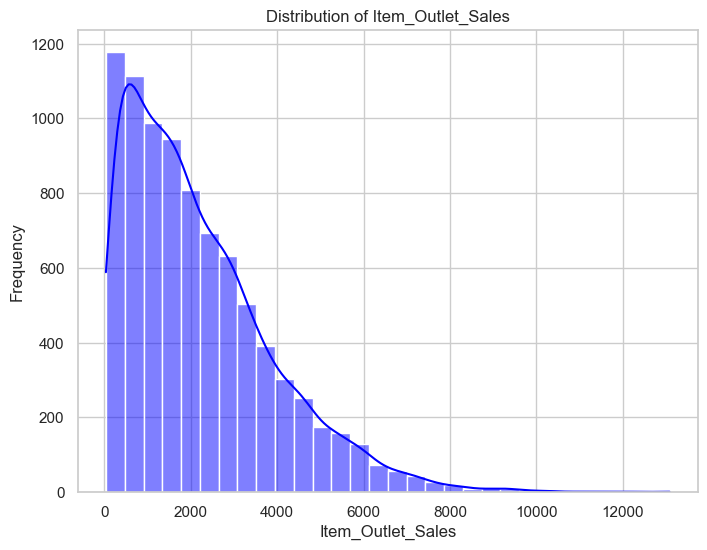

In [5]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plotting
sns.set(style="whitegrid")

# Plotting the distribution of the target variable 'Item_Outlet_Sales'
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Item_Outlet_Sales'], bins=30, kde=True, color='blue')
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()


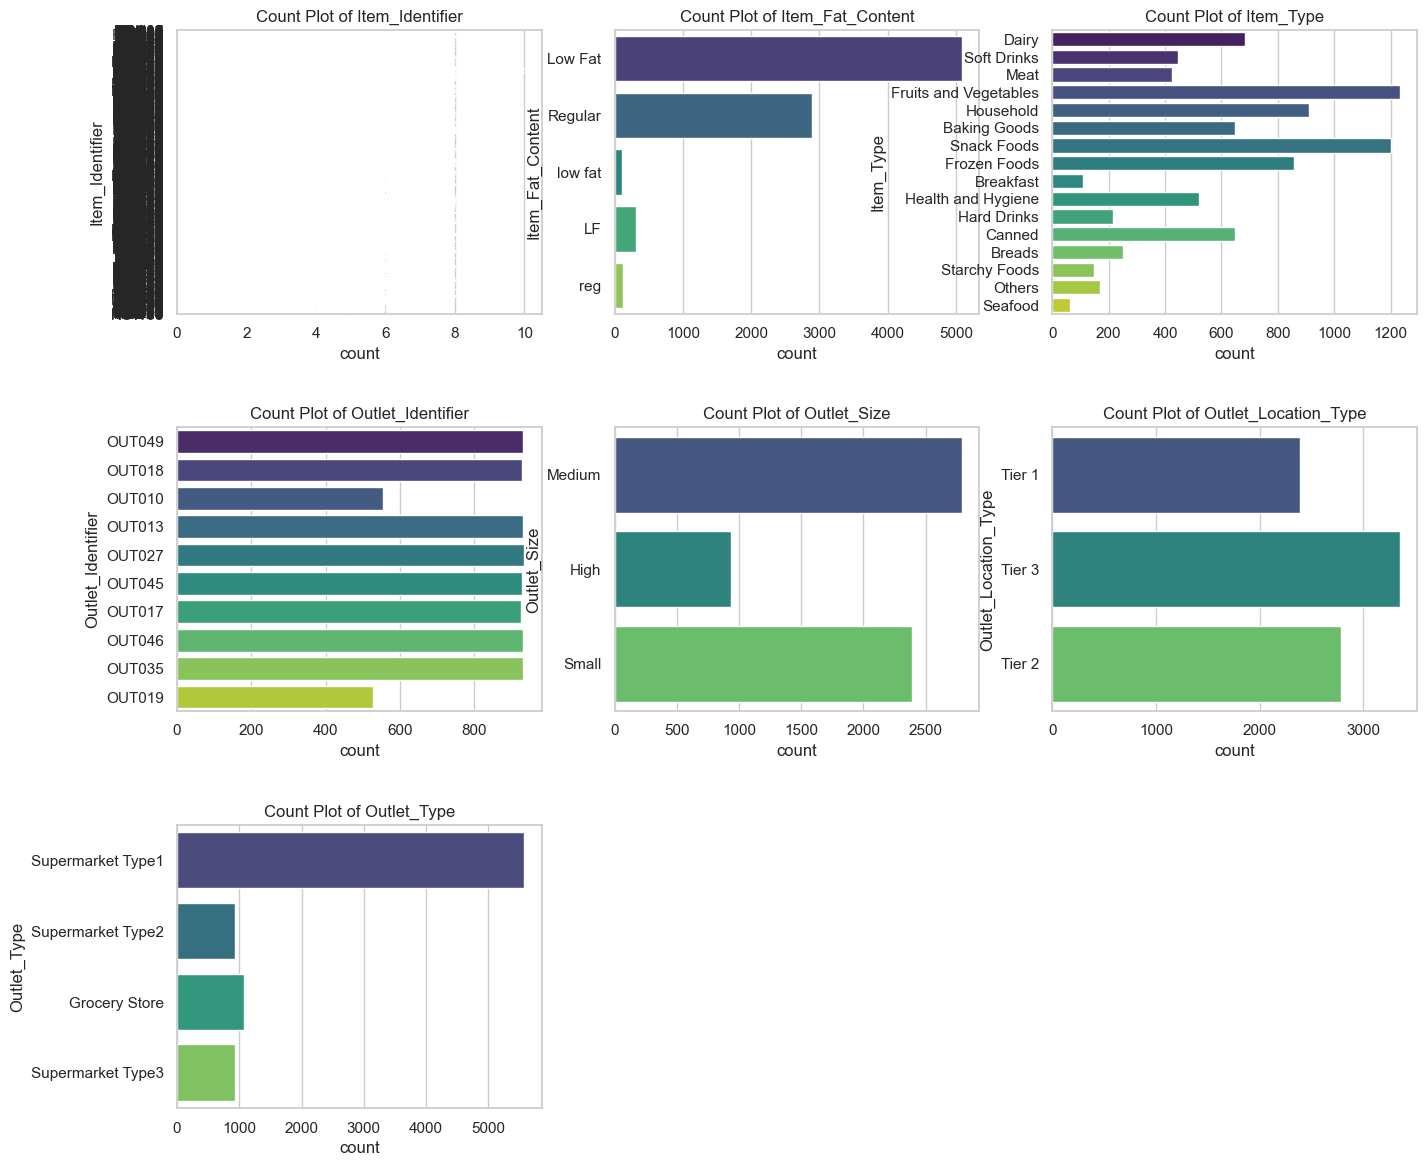

In [6]:
# Univariate analysis of categorical variables in the train data
plt.figure(figsize=(16, 14))
plt.subplots_adjust(hspace=0.4)

# Plotting count plots for each categorical variable
for i, col in enumerate(train_data.select_dtypes(include='object').columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=train_data, palette='viridis')
    plt.title(f'Count Plot of {col}')

plt.show()


C:\Users\ishan\AppData\Local\Temp\ipykernel_22196\1653337757.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='Item_Outlet_Sales', data=train_data, palette='viridis')
C:\Users\ishan\AppData\Local\Temp\ipykernel_22196\1653337757.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='Item_Outlet_Sales', data=train_data, palette='viridis')
C:\Users\ishan\AppData\Local\Temp\ipykernel_22196\1653337757.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='Item_Outlet_Sales', data=train_data, palette='viridis')
C:\Users\ishan\AppData\Local\Temp\ipykernel_22196\1653337757.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=col, y='Item_Outlet_Sales', data=train_data, palette='viridis')


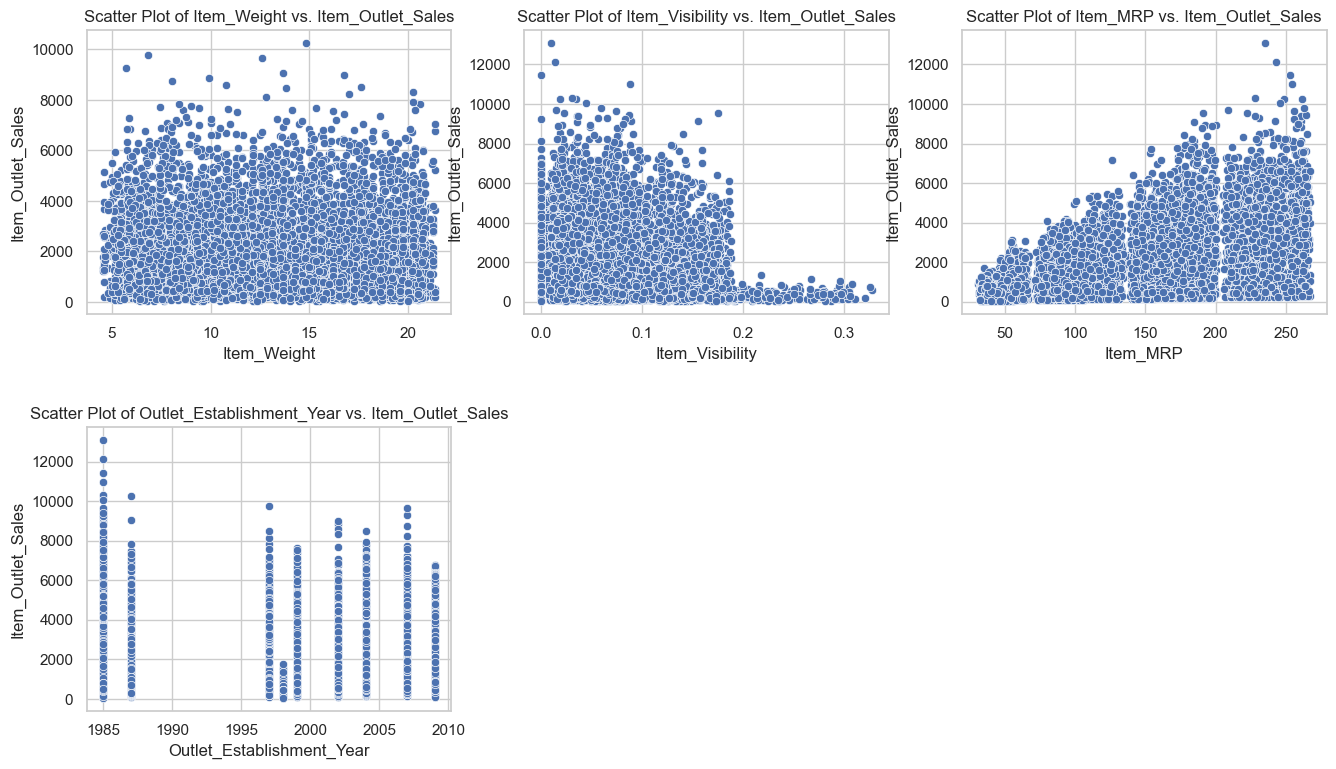

In [7]:
# Bivariate analysis of numerical variables with the target variable in the train data
plt.figure(figsize=(16, 14))
plt.subplots_adjust(hspace=0.4)

# Plotting scatter plots for each numerical variable with the target variable
for i, col in enumerate(train_data.select_dtypes(include=['float64', 'int64']).columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='Item_Outlet_Sales', data=train_data, palette='viridis')
    plt.title(f'Scatter Plot of {col} vs. Item_Outlet_Sales')

plt.show()


In [8]:
# Checking missing values in train and test data
print("Missing values in train data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())

# Imputing missing values for 'Item_Weight' with the mean
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

# Imputing missing values for 'Outlet_Size' with the mode
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

# Confirming that missing values have been treated
print("\nMissing values after treatment:")
print("Train Data:")
print(train_data.isnull().sum())

print("\nTest Data:")
print(test_data.isnull().sum())


Missing values in train data:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in test data:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing values after treatment:
Train Data:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content         

In [9]:
# Identify categorical columns
cat_cols = train_data.select_dtypes(include=["object"]).columns

# Display the identified categorical columns
print("Categorical Columns:", cat_cols)


Categorical Columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns in train and test data
for col in cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

# Display the first few rows of the modified train and test data
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())


Train Data:
   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 1         0.016047          4   
1                8         5.92                 2         0.019278         14   
2              662        17.50                 1         0.016760         10   
3             1121        19.20                 2         0.000000          6   
4             1297         8.93                 1         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            1   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales 

In [11]:
# Perform one-hot encoding on categorical columns in both train and test data
train_data_encoded = pd.get_dummies(train_data, columns=cat_cols, drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=cat_cols, drop_first=True)

# Display the encoded data
print("Encoded Train Data:")
print(train_data_encoded.head())

print("\nEncoded Test Data:")
print(test_data_encoded.head())


Encoded Train Data:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  Item_Identifier_1  Item_Identifier_2  Item_Identifier_3  \
0          3735.1380              False              False              False   
1           443.4228              False              False              False   
2          2097.2700              False              False              False   
3           732.3800              False              False              False   
4           994.7052              False              False              False   

   Item_Identifier_4  Item_Identifier_5  ...  Outlet_Identif

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define the features (X) and target variable (y)
X = train_data_encoded.drop("Item_Outlet_Sales", axis=1)
y = train_data_encoded["Item_Outlet_Sales"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

# Display the first few rows of the scaled train and validation data
print("Scaled Train Data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

print("\nScaled Validation Data:")
print(pd.DataFrame(X_val_scaled, columns=X.columns).head())


Scaled Train Data:
   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.800211        -0.600703  0.470709                   0.136169   
1     1.211317        -0.362159  0.457877                   0.493521   
2     1.116657         0.194933 -0.482625                  -0.102066   
3    -1.078275        -0.704944 -1.603553                   0.493521   
4    -0.007432         1.383177  0.218375                  -0.102066   

   Item_Identifier_1  Item_Identifier_2  Item_Identifier_3  Item_Identifier_4  \
0          -0.029678          -0.032059          -0.020981           -0.02709   
1          -0.029678          -0.032059          -0.020981           -0.02709   
2          -0.029678          -0.032059          -0.020981           -0.02709   
3          -0.029678          -0.032059          -0.020981           -0.02709   
4          -0.029678          -0.032059          -0.020981           -0.02709   

   Item_Identifier_5  Item_Identifier_6  ...  Outlet_Identifi

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the training data
linear_reg_model.fit(X_train, y_train)

# Predictions on the validation set
linear_reg_preds = linear_reg_model.predict(X_val)

# Evaluate the model
linear_reg_mse = mean_squared_error(y_val, linear_reg_preds)
linear_reg_rmse = np.sqrt(linear_reg_mse)
linear_reg_r2 = r2_score(y_val, linear_reg_preds)

# Display the evaluation metrics
print("Linear Regression Model:")
print("Mean Squared Error (MSE):", linear_reg_mse)
print("Root Mean Squared Error (RMSE):", linear_reg_rmse)
print("R-squared (R2):", linear_reg_r2)


Linear Regression Model:
Mean Squared Error (MSE): 6.503472051357803e+23
Root Mean Squared Error (RMSE): 806441073566.9286
R-squared (R2): -2.3927680923481254e+17


In [14]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Set up the Ridge Regression model
ridge_reg_model = Ridge()

# Set up the hyperparameter grid for GridSearchCV
ridge_param_grid = {'alpha': [0.1, 1, 10, 100]}

# Initialize GridSearchCV for Ridge Regression
ridge_grid_search = GridSearchCV(ridge_reg_model, param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
ridge_grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_ridge_alpha = ridge_grid_search.best_params_['alpha']

# Initialize the Ridge Regression model with the best alpha
ridge_reg_model = Ridge(alpha=best_ridge_alpha)

# Fit the model on the training data
ridge_reg_model.fit(X_train, y_train)

# Predictions on the validation set
ridge_reg_preds = ridge_reg_model.predict(X_val)

# Evaluate the model
ridge_reg_mse = mean_squared_error(y_val, ridge_reg_preds)
ridge_reg_rmse = np.sqrt(ridge_reg_mse)
ridge_reg_r2 = r2_score(y_val, ridge_reg_preds)

# Display the evaluation metrics
print("\nRidge Regression Model:")
print("Best Alpha:", best_ridge_alpha)
print("Mean Squared Error (MSE) with Ridge Regression:", ridge_reg_mse)
print("Root Mean Squared Error (RMSE) with Ridge Regression:", ridge_reg_rmse)
print("R-squared (R2) with Ridge Regression:", ridge_reg_r2)



Ridge Regression Model:
Best Alpha: 10
Mean Squared Error (MSE) with Ridge Regression: 1178160.9965797155
Root Mean Squared Error (RMSE) with Ridge Regression: 1085.4312491262242
R-squared (R2) with Ridge Regression: 0.5665290758531907


In [15]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
random_forest_model.fit(X_train, y_train)

# Predictions on the validation set
random_forest_preds = random_forest_model.predict(X_val)

# Evaluate the model
random_forest_mse = mean_squared_error(y_val, random_forest_preds)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_preds)

# Display the evaluation metrics
print("Random Forest Model:")
print("Mean Squared Error (MSE) with Random Forest:", random_forest_mse)
print("Root Mean Squared Error (RMSE) with Random Forest:", random_forest_rmse)
print("R-squared (R2) with Random Forest:", random_forest_r2)


Random Forest Model:
Mean Squared Error (MSE) with Random Forest: 1195616.95491793
Root Mean Squared Error (RMSE) with Random Forest: 1093.442707652271
R-squared (R2) with Random Forest: 0.5601066510617567


In [16]:
# Assuming a binary classification problem with a threshold (e.g., 0.5)
threshold = 0.5

# Convert regression predictions to binary classification (1 if predicted value > threshold else 0)
binary_preds = (random_forest_preds > threshold).astype(int)

# Import necessary library for confusion matrix
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(y_val > threshold, binary_preds)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1705]]


In [20]:
# Assuming you have already loaded and preprocessed your data (including one-hot encoding and handling missing values)

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Separate features and target variable
X = train_data_encoded.drop("Item_Outlet_Sales", axis=1)
y = train_data_encoded["Item_Outlet_Sales"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1162514.004643202
Root Mean Squared Error (RMSE): 1078.1994271206056
R-squared (R2): 0.5722859427623214


In [22]:
from xgboost import XGBRegressor

# Assuming you have already loaded and preprocessed your data
# Separate features and target variable
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [23]:
# Assuming you have already loaded and preprocessed your data
# Separate features and target variable
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data['Item_Outlet_Sales']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# 15. Summary

# Summary Statistics
train_summary = train_data.describe(include='all')
test_summary = test_data.describe(include='all')

# Feature Importance
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Model Performance
model_performance = pd.DataFrame({
    'Model': ['XGBoost'],
    'MSE': [1162514.004643202],
    'RMSE': [1078.1994271206056],
    'R2': [0.5722859427623214]
})

# Display Summary
print("\nSummary Statistics for Train Data:")
print(train_summary)

print("\nSummary Statistics for Test Data:")
print(test_summary)

print("\nFeature Importance:")
print(feature_importance_df)

print("\nModel Performance:")
print(model_performance)



Summary Statistics for Train Data:
       Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
count      8523.000000  8523.000000       8523.000000      8523.000000   
mean        779.714889    12.857645          1.369354         0.066132   
std         449.222377     4.226124          0.644810         0.051598   
min           0.000000     4.555000          0.000000         0.000000   
25%         395.500000     9.310000          1.000000         0.026989   
50%         783.000000    12.857645          1.000000         0.053931   
75%        1167.000000    16.000000          2.000000         0.094585   
max        1558.000000    21.350000          4.000000         0.328391   

         Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
count  8523.000000  8523.000000        8523.000000                8523.000000   
mean      7.226681   140.992782           4.722281                1997.831867   
std       4.209990    62.275067           2.837201    